<a href="https://colab.research.google.com/github/tainanbogo/potencia-feminina-git-e-github/blob/master/C%C3%B3pia_de_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd


url = 'https://import.cdn.thinkific.com/401289/gQbVuYr9TaimUX9dQAqV_enem_2023.json'
response = requests.get(url)
if response.status_code == 200:
  data = response.json()
  print('Dados carregados')
else:
  print('Falha ao carregar os dados')


Dados carregados


In [ ]:
df = pd.DataFrame(data)
df = df.apply(pd.to_numeric, errors='coerce')
amplitudes = df.max() - df.min()
disciplina_maior_amplitude = amplitudes.idxmax()

print(f'1) A disciplina com maior amplitude é {disciplina_maior_amplitude}')

1) A disciplina com maior amplitude é Redação


In [ ]:
df = df.drop(columns=['Sexo'])
df = df.apply(pd.to_numeric, errors='coerce')

media_por_disciplina = df.mean()

mediana_por_disciplina = df.median()

print("Média por disciplina:")
print(media_por_disciplina)
print("\nMediana por disciplina:")
print(mediana_por_disciplina)

Média por disciplina:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

Mediana por disciplina:
Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64


In [ ]:
pesos = {
    'Redação': 2,
    'Matemática': 4,
    'Linguagens': 2,
    'Ciências humanas': 1,
    'Ciências da natureza': 1
}
for disciplina, peso in pesos.items():
    df[disciplina] *= peso

df_sorted = df.sort_values(by='Redação', ascending=False)
df_top500 = df_sorted.head(500)
media_ponderada = df_top500.mean()

desvio_padrao_ponderado = df_top500.std()

print("Média ponderada das notas dos 500 estudantes mais bem colocados:")
print(media_ponderada)
print("\nDesvio padrão das notas ponderadas dos 500 estudantes mais bem colocados:")
print(desvio_padrao_ponderado)

Média ponderada das notas dos 500 estudantes mais bem colocados:
Linguagens              1026.288356
Ciências humanas         524.971620
Ciências da natureza     498.605241
Matemática              2143.235463
Redação                 1430.904887
dtype: float64

Desvio padrão das notas ponderadas dos 500 estudantes mais bem colocados:
Linguagens              170.958161
Ciências humanas         82.218994
Ciências da natureza     79.032261
Matemática              364.021757
Redação                 150.345802
dtype: float64


In [ ]:
df_40_vagas = df_top500.head(40)

media_40_vagas = df_40_vagas.mean()
variancia_40_vagas = df_40_vagas.var()

print("Média das notas dos estudantes que entraram no curso de Ciência da Computação:")
print(media_40_vagas)
print("\nVariância das notas dos estudantes que entraram no curso de Ciência da Computação:")
print(variancia_40_vagas)

Média das notas dos estudantes que entraram no curso de Ciência da Computação:
Linguagens              1017.506349
Ciências humanas         526.522796
Ciências da natureza     500.830289
Matemática              2116.185678
Redação                 1766.803745
dtype: float64

Variância das notas dos estudantes que entraram no curso de Ciência da Computação:
Linguagens               34194.545120
Ciências humanas          8179.098443
Ciências da natureza      5981.114721
Matemática              123500.483488
Redação                   5183.955582
dtype: float64


In [ ]:
q3_matematica = df['Matemática'].quantile(0.75)
q3_linguagens = df['Linguagens'].quantile(0.75)

teto_q3_matematica = int(q3_matematica) if q3_matematica.is_integer() else int(q3_matematica) + 1
teto_q3_linguagens = int(q3_linguagens) if q3_linguagens.is_integer() else int(q3_linguagens) + 1

print("Teto do terceiro quartil para Matemática:", teto_q3_matematica)
print("Teto do terceiro quartil para Linguagens:", teto_q3_linguagens)

Teto do terceiro quartil para Matemática: 2372
Teto do terceiro quartil para Linguagens: 1144


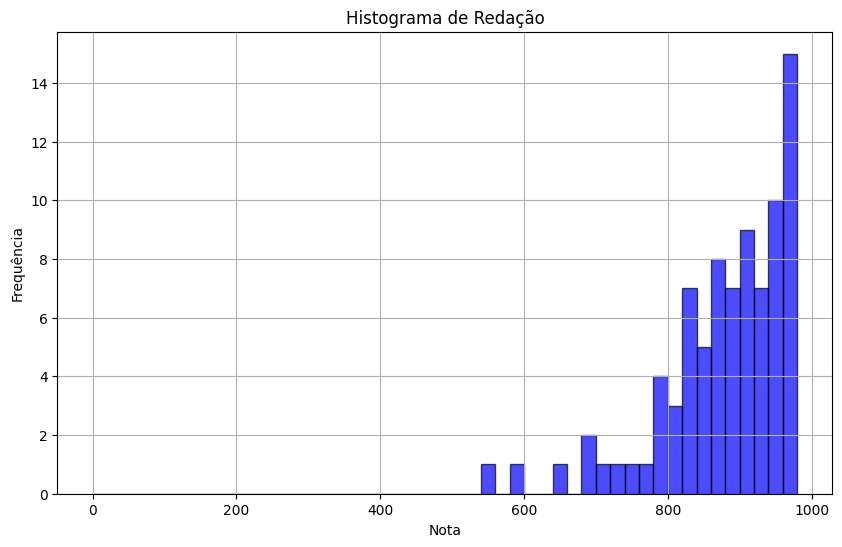

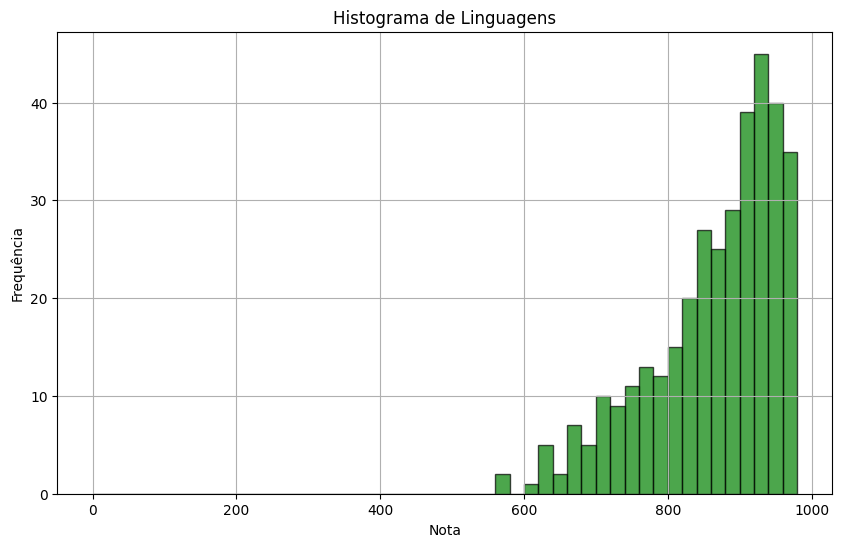

In [ ]:
bins = range(0, 1000, 20)

plt.figure(figsize=(10, 6))
plt.hist(df['Redação'], bins=bins, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histograma de Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Linguagens'], bins=bins, color='green', alpha=0.7, edgecolor='black')
plt.title('Histograma de Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()